In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
# nltk.download('all')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

df = pd.read_csv('./data.tsv', sep='\t')


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'matplotlib'

In [16]:
df["dates"] = df["dates"].apply(lambda x: x.replace("/", "-"))
df

,titles,contents,ratings,votes,authors,dates
0,The Black Bone Tree,"Two days ago, I drove up to northern Vermont t...",9.60,10.0,Elias Witherow,05-07-2021
1,Did You Check the Box?,"In a dilapidated house at the edge of a small,...",10.00,2.0,N.M Brown,02-05-2024
2,Souls-like,"“Do you play video games, Terrance?” The devil...",9.33,3.0,Craig Groshek,12-10-2023
3,The Devouring Mirror,"“That one is very special,” said the old man r...",10.00,3.0,Craig Groshek,12-09-2023
4,The Long Ride Not Home,"Too often, throughout history, what we can’t e...",10.00,2.0,Dan A. Cardoza,12-08-2023
...,...,...,...,...,...,...
1044,The Thing,There were two young boys named Trevor and Wil...,9.00,17.0,Anonymous,12-01-2012
1045,The Staring Doll,Heather was at her friend Jenny’s house one af...,8.33,15.0,Jack Stryker,11-25-2012
1046,Duality,"Curious case today. Very curious, indeed. In f...",5.63,8.0,Christian Thompson,07-15-2011
1047,God’s Attic,The boy heard the soft tinkle of a bell as he ...,9.30,10.0,Christian Thompson,03-11-2011


In [19]:
df["dates"] = pd.to_datetime(df["dates"], format="%m-%d-%Y")

In [21]:
df.sort_values(by="dates", inplace=True)

In [22]:
df

,titles,contents,ratings,votes,authors,dates
21,The Russian Sleep Experiment,Russian researchers in the late 1940s kept fiv...,9.58,53.0,Anonymous,2009-08-08
13,1999,“The year is nineteen-ninety-nine.”\nThat sent...,8.61,31.0,Camden Lamont,2009-11-14
16,Gateway of the Mind,"In 1983, a team of deeply pious scientists con...",8.91,11.0,Anonymous,2009-11-23
1048,The Feeling,Go to any mirror and put your hand against the...,7.10,10.0,Anonymous,2009-12-05
1047,God’s Attic,The boy heard the soft tinkle of a bell as he ...,9.30,10.0,Christian Thompson,2011-03-11
...,...,...,...,...,...,...
5,Arborvitae,"“We’re gonna make this a tradition,” Jerry sai...",5.50,2.0,Micah Edwards,2023-11-27
4,The Long Ride Not Home,"Too often, throughout history, what we can’t e...",10.00,2.0,Dan A. Cardoza,2023-12-08
3,The Devouring Mirror,"“That one is very special,” said the old man r...",10.00,3.0,Craig Groshek,2023-12-09
2,Souls-like,"“Do you play video games, Terrance?” The devil...",9.33,3.0,Craig Groshek,2023-12-10


## __Exploratory Data Analysis__

In [2]:
def plot_box_with_hist(dataset, feature, figsize=(12, 4)):
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
    sns.boxplot(data=dataset, x=feature, ax=axes[0])
    sns.histplot(data=dataset, x=feature, kde=True, ax=axes[1])
    plt.tight_layout()
    plt.show()

Checking null

In [3]:
df.isnull().sum()/df.shape[0]

titles      0.000000
contents    0.000000
ratings     0.001907
votes       0.001907
authors     0.000000
dates       0.000000
dtype: float64

Imputing null values with 0


In [4]:
df['ratings'] = df['ratings'].fillna(0)
df['votes'] = df['votes'].fillna(0)

#### __Ratings__

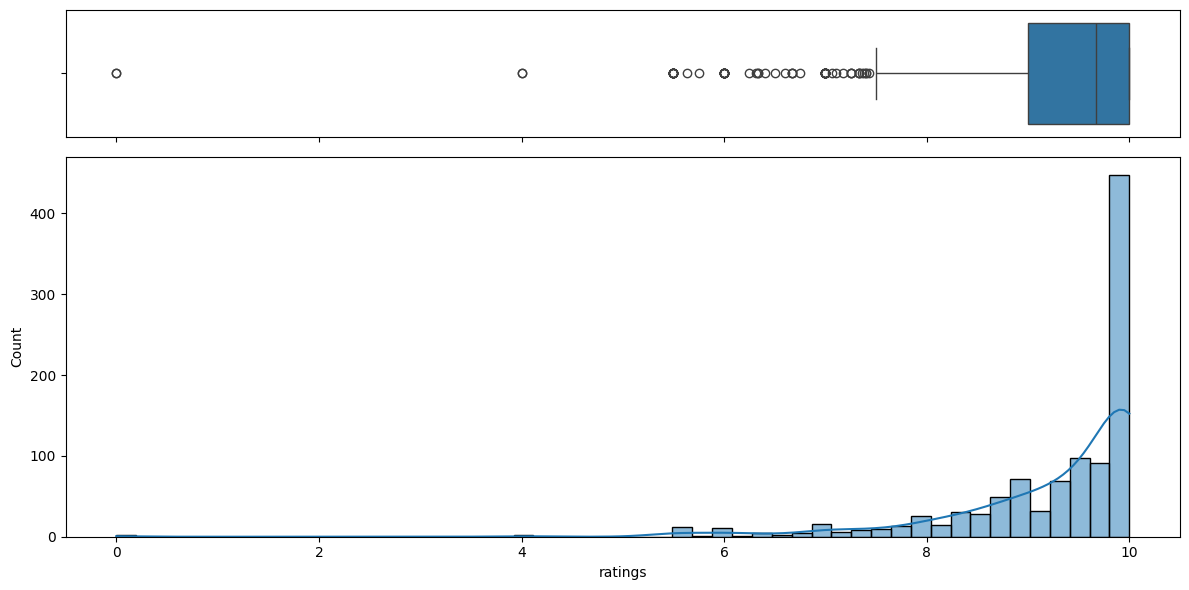

In [5]:
plot_box_with_hist(df, 'ratings', figsize=(12, 6))

In [6]:
df['ratings'].describe()

count    1049.000000
mean        9.264433
std         1.065145
min         0.000000
25%         9.000000
50%         9.670000
75%        10.000000
max        10.000000
Name: ratings, dtype: float64

The range of ratings is from 0 to 10. The distribution is skewed to the right, with a mean is 9.26.

##### __Votes__

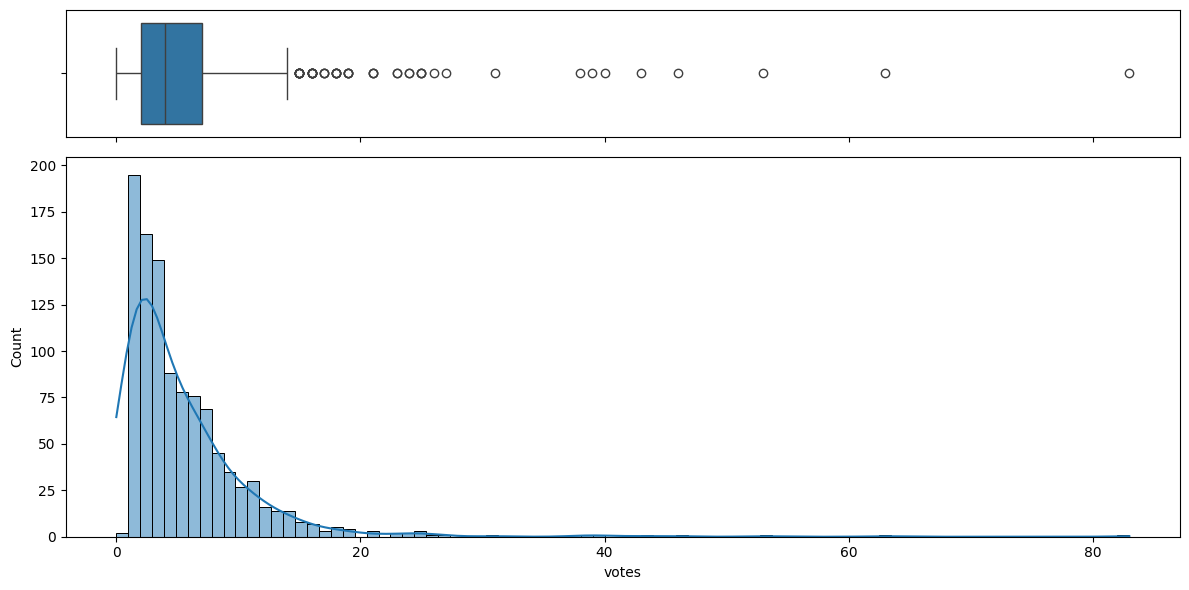

In [7]:
plot_box_with_hist(df, 'votes', figsize=(12, 6))

In [8]:
df['votes'].describe()

count    1049.000000
mean        5.399428
std         6.024254
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        83.000000
Name: votes, dtype: float64

The distribution of votes is skewed to left, with a mean of 10.21.

### __Analyzing text statistics__

#### __Word count__


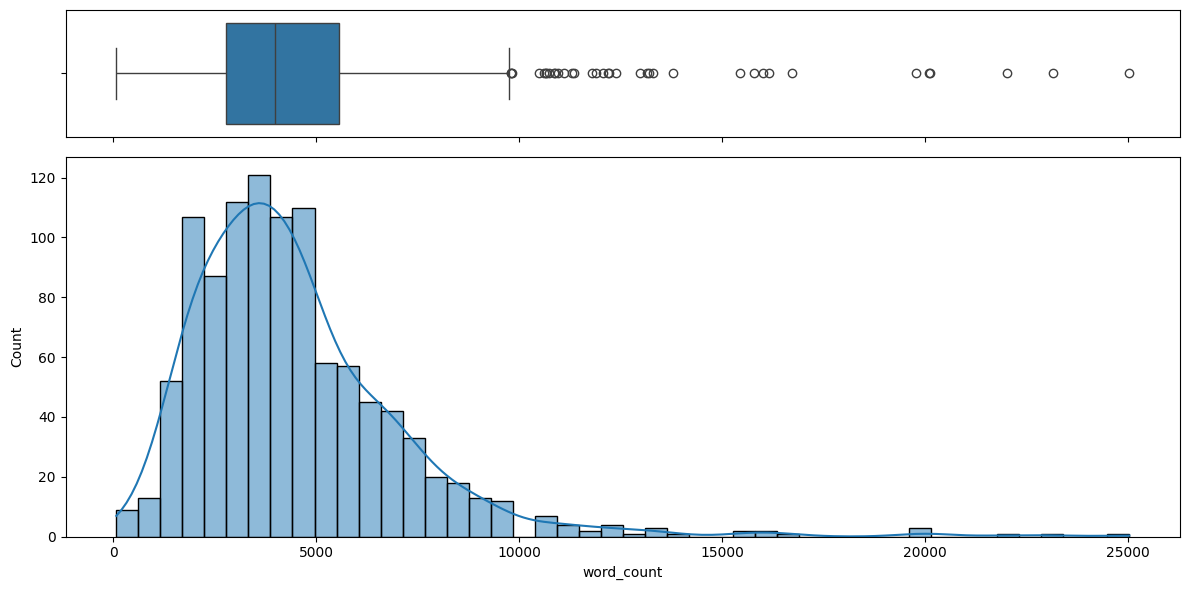

In [9]:
df['word_count'] = df['contents'].apply(lambda x: len(x.split()))
plot_box_with_hist(df, 'word_count', figsize=(12, 6))

In [10]:
df['word_count'].describe()

count     1049.000000
mean      4500.354623
std       2703.750333
min         79.000000
25%       2778.000000
50%       3997.000000
75%       5574.000000
max      25030.000000
Name: word_count, dtype: float64

#### __Character count__

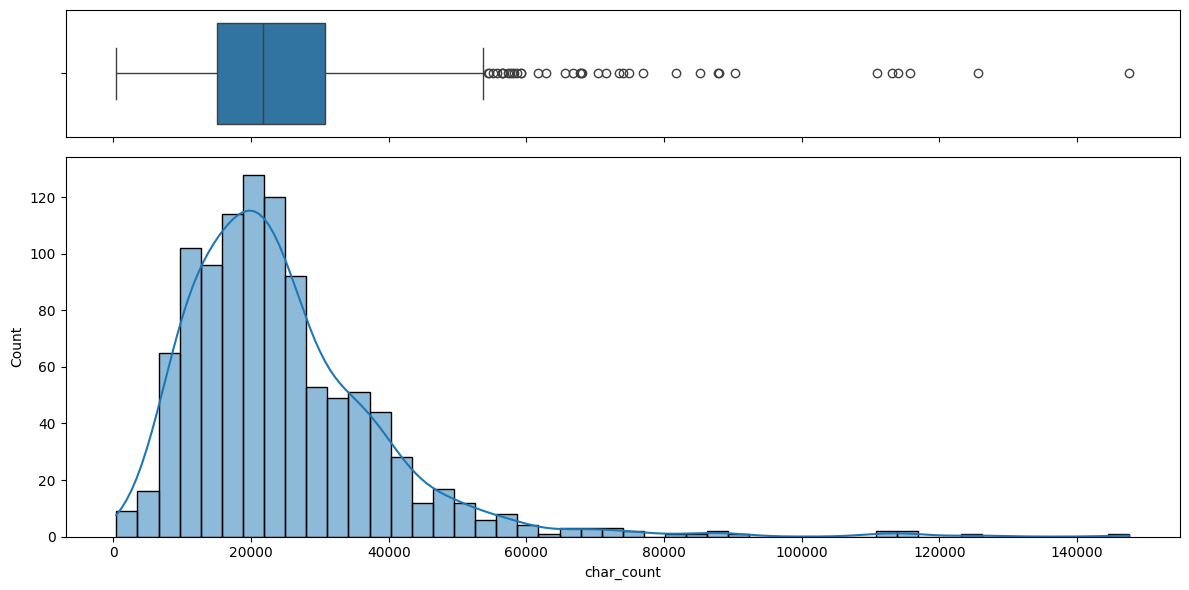

In [11]:
df['char_count'] = df['contents'].apply(lambda x: len(x))
plot_box_with_hist(df, 'char_count', figsize=(12, 6))


In [12]:
df['char_count'].describe()

count      1049.000000
mean      24562.920877
std       14994.263700
min         421.000000
25%       14994.000000
50%       21703.000000
75%       30676.000000
max      147598.000000
Name: char_count, dtype: float64

#### __Average word length__

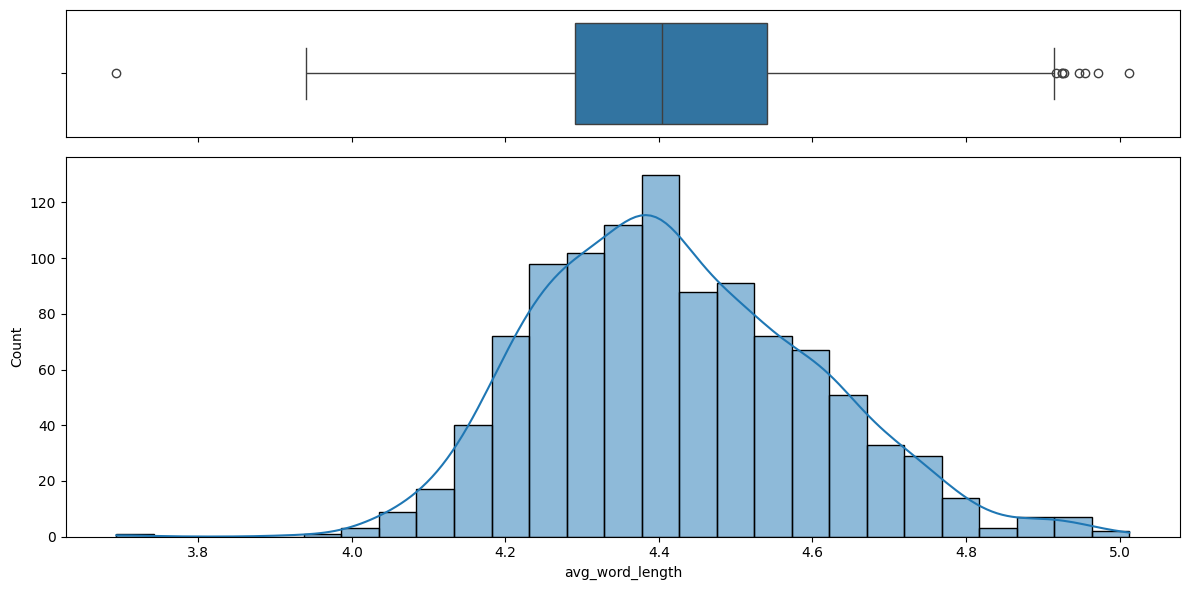

In [13]:
df['avg_word_length'] = df['contents'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
plot_box_with_hist(df, 'avg_word_length', figsize=(12, 6))

In [14]:
df['avg_word_length'].describe()

count    1049.000000
mean        4.421188
std         0.178600
min         3.693252
25%         4.291045
50%         4.403484
75%         4.541291
max         5.012703
Name: avg_word_length, dtype: float64

#### __Average sentence length__

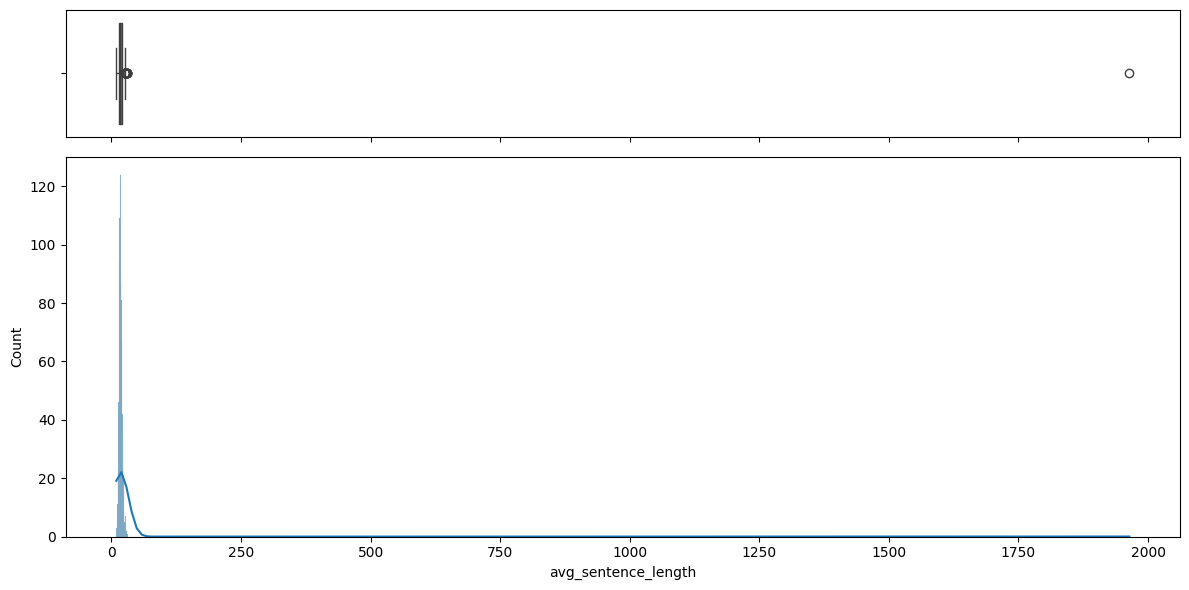

In [15]:
df['avg_sentence_length'] = df['contents'].apply(lambda x: 
    sum(len(word_tokenize(sent)) for sent in sent_tokenize(x)) / len(sent_tokenize(x))
)
plot_box_with_hist(df, 'avg_sentence_length', figsize=(12, 6))

In [16]:
df['avg_sentence_length'].describe()

count    1049.000000
mean       19.663695
std        60.177038
min         9.402410
25%        15.521008
50%        17.288462
75%        19.651079
max      1964.000000
Name: avg_sentence_length, dtype: float64

## __Words Frequency__

In [39]:
def get_corpus(text: pd.Series) -> list:
    content = df['contents'].str.split()
    content = content.values.tolist()
    corpus = [word.lower().replace('.', '').replace('“', '').replace('”', '').replace('!', '').replace('?', '').replace(',', '').replace(';', '').replace(':', '') for i in content for word in i]
    return corpus

#### __Ngrams__
Ngrams are contiguous sequences of N items from a given sample of text or speech. Unigrams are single words, bigrams are two words, trigrams are three words, and so on.

__Stopwords__ and __Non-stopwords__

Stop words are basically a set of commonly used words in any language, not just English. For example, "a", "the", "is", "are" are stop words in English.


In [51]:
def get_top_ngram(text: pd.Series, top = 10, n=None) -> pd.DataFrame:
    corpus = get_corpus(text)
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    words, counts = zip(*words_freq)
    words_counts = pd.DataFrame({'word': words, 'count': counts})
    if n == 1:
        stop = set(stopwords.words('english'))
        words_counts["is_stopword"] = words_counts["word"].isin(stop)
    return words_counts[:top]

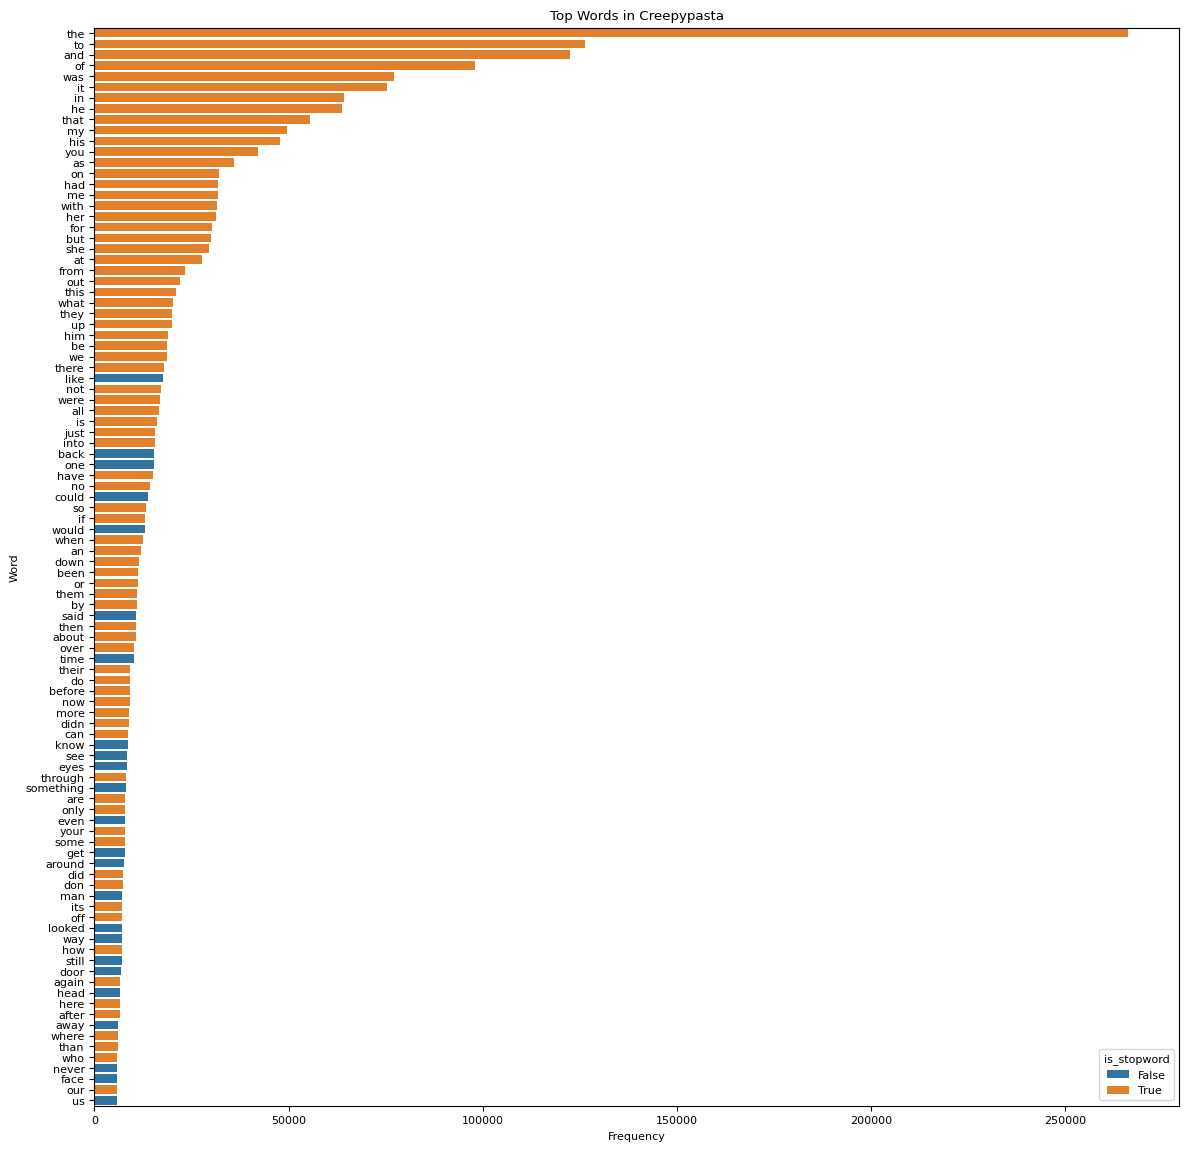

In [53]:
unigrams = get_top_ngram(df['contents'], top=100, n=1)

plt.figure(figsize=(14, 14))  # Tăng kích thước biểu đồ để có thêm không gian
plt.rcParams['font.size'] = 8  # Điều chỉnh kích thước chữ

sns.barplot(x='count', y='word', hue='is_stopword', data=unigrams)
plt.title('Top Words in Creepypasta')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

The chart shows that most of the top words are stopwords, which are commonly used in English.

__Bigrams__


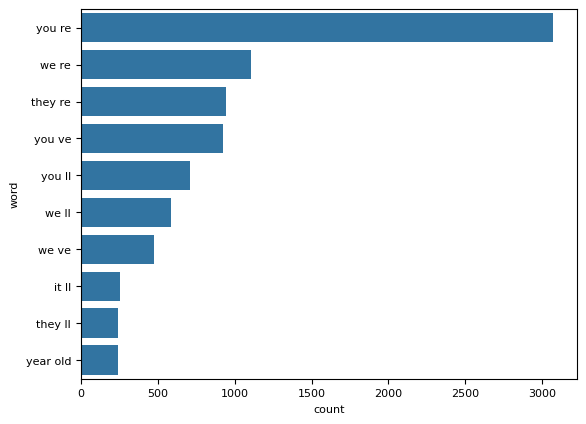

In [49]:
bigrams = get_top_ngram(df['contents'], top=10, n=2)
sns.barplot(x='count', y='word', data=bigrams)
plt.show()

As we can see, most two-word phrases are subject-verb pairs. This may makes readers feel that they are part of a story, therefore the terror, horror, and mystery are boosted maximally.

__Trigrams__


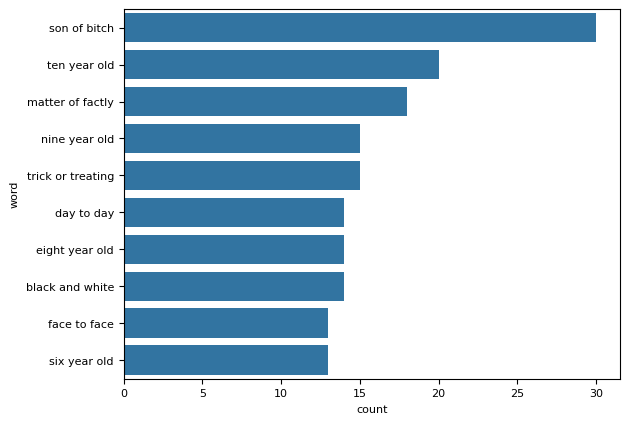

In [54]:
trigrams = get_top_ngram(df['contents'], top=10, n=3)
sns.barplot(x='count', y='word', data=trigrams)
plt.show()

The trigrams chart shows top 10 phrases relating to age and mystery. This can be explain that children or the unclarity memory of the past are the most common elements in the creepypasta.

## __Sentiment Analysis__


The sentiment function of TextBlob returns two properties:

`polarity`: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

`subjectivity`: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

For example, the sentence "100 people are killed in Iraq" has polarity of -0.11 and subjectivity of 0.0. This mean the sentence is negative and is not an opinion or feeling but rather a factual statement.


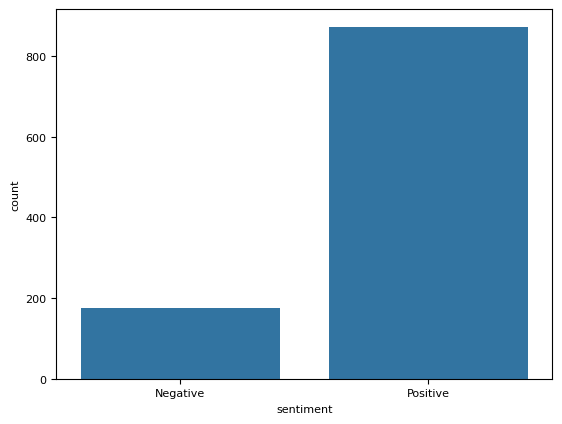

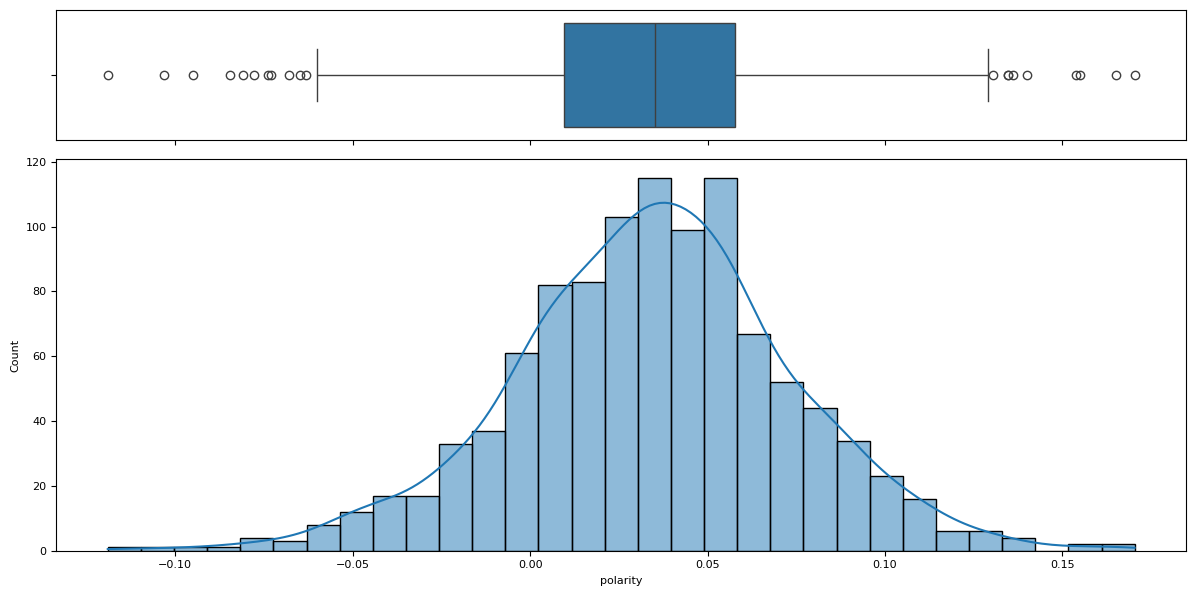

In [60]:
def get_polarity(text: str) -> float:
    blob = TextBlob(text)
    return blob.sentiment.polarity 

def get_sentiment(polarity: float) -> str:
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['polarity'].apply(lambda x: get_sentiment(x))
sns.countplot(x='sentiment', data=df)
plt.show()

df['polarity'] = df['contents'].apply(lambda x: get_polarity(x))
plot_box_with_hist(df, 'polarity', figsize=(12, 6))


## __Exploration through parts of speech tagging__

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

- Noun (NN)- Joseph, London, table, cat, teacher, pen, city
- Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
- Adjective(JJ)- beautiful, happy, sad, young, fun, three
- Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
- Preposition (IN)- at, on, in, from, with, near, between, about, under
- Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
- Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
- Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

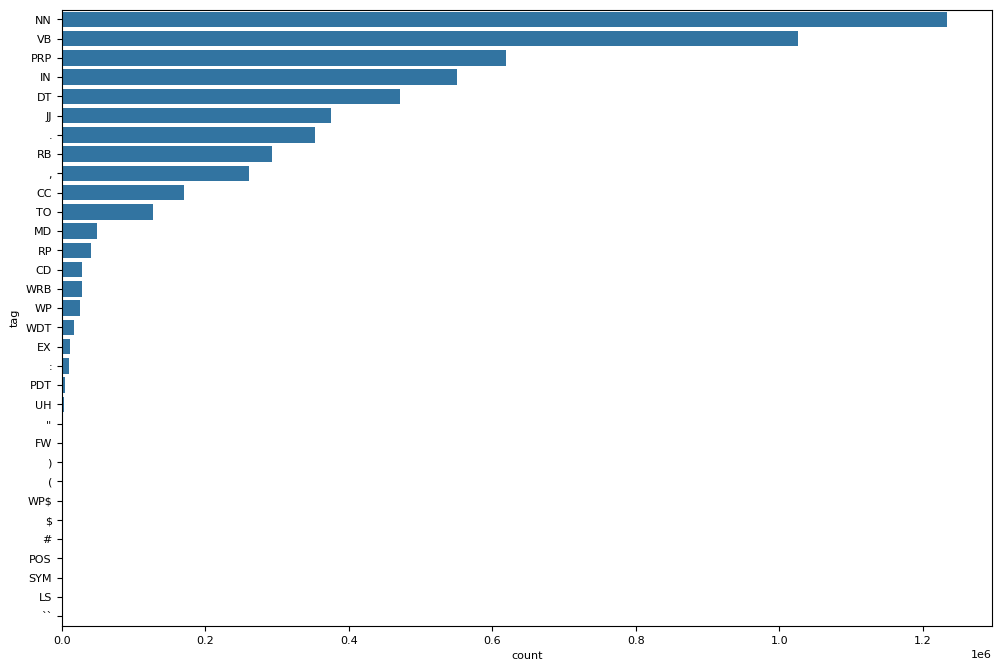

In [80]:

def create_pos_tags(text: pd.Series) -> pd.DataFrame:
    def retag(tag):
        if tag.startswith('NN'):
            return 'NN'
        elif tag.startswith('VB'):
            return 'VB'
        elif tag.startswith('JJ'):
            return 'JJ'
        elif tag.startswith('RB'):
            return 'RB'
        elif tag.startswith('IN'):
            if tag == 'INT': return 'INT'
            return 'IN'
        elif tag.startswith('CC'):
            return 'CC'
        elif tag.startswith('PRP'):
            return 'PRP'
        else:
            return tag
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list, zip(*pos)))[1]
    retagged_pos = [retag(tag) for tag in pos]
    return retagged_pos

tags = df['contents'].apply(lambda x: create_pos_tags(x))
tags = [x for l in tags for x in l]
tags_counter=Counter(tags)

tags_df = pd.DataFrame(tags_counter.items(),columns=['tag','count'])
tags_df = tags_df.groupby('tag').sum().sort_values(by='count', ascending=False)


plt.figure(figsize= (12,8))
sns.barplot(x = 'count', y = 'tag', data = tags_df)
plt.show()